### **Importing Necessary Libraries**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [15]:
def convolve_linear_brute_force(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    x = np.pad(x, (len(h)-1,len(h)-1))                                          # Pad Zeros at the start and end
    y = np.zeros(len(x)+len(h)-1)                                               # Initialise empty array for y

    shift = 0
    while len(h)+shift<=len(x):                                                 # Looping till flipped h reaches the end

        y[shift] = np.sum(np.flip(h) * x[shift:len(h)+shift])                   # Point wise multiply flipped h and x and sum it up
        shift+=1
    y = np.trim_zeros(y)                                                        # Trip extra zeros at the start and end (if any)

    return y

In [16]:
def convolve_linear_toeplitz(x,h):

    if len(x)<len(h):                                                           # making the array with the bigger size =  x
        t = h.copy()
        h = x.copy()
        x = t.copy()

    h = np.pad(h,(0,len(x)-1))                                                  # Pad necessary zeros at the end of h
    H = np.transpose([np.roll(h,shift) for shift in range(len(x))])             # Create the toeplitz matrix

    y = np.trim_zeros(np.matmul(H,x))                                           # Multiply H and x to find y (Remove any extra zeros at the end if any)

    return y

In [17]:
def convolve_linear_using_dft(x,h):

    X = np.fft.fft(x, n = (len(x)+len(h)-1))                                    # Take N + M - 1 pt dft of x
    H = np.fft.fft(h, n = (len(x)+len(h)-1))                                    # Take N + M - 1 pt dft of x

    y = np.real(np.fft.ifft(H*X))                                               # Pt wise multiply H and X and take IDFT

    return y

In [26]:
# Signal Construction

fs = 200                                                                        # Sampling Frequency
f = 20                                                                          # Frequency of Given Sinusoid
t = np.arange(0,1,1/fs)                                                         # Creating TimeStamps array
eta = np.random.normal(size = len(t), loc = 0, scale = 0.2)                     # Noise
x = np.sin(2*math.pi*f*t) + 0.8*eta                                             # Final Signal (x)
h = np.ones(3)*1/3                                                              # Filter (h)

N = len(x)+len(h)-1
t_y = np.arange(0,N*1/fs,1/fs)

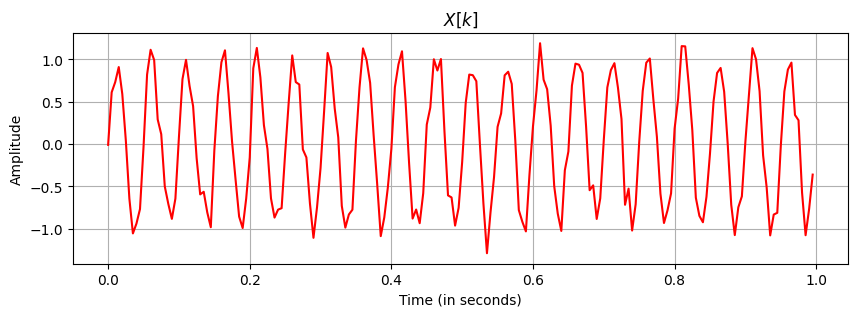

In [19]:
plt.figure(figsize = (10,3))

plt.plot(t,x,'r')
plt.title('$X[k]$', weight  = 'bold')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

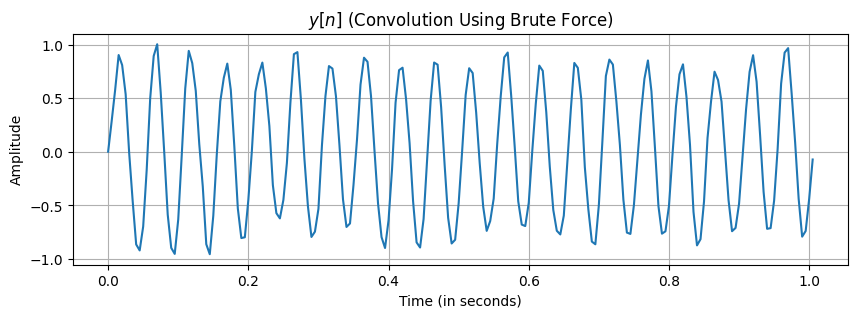

In [28]:
plt.figure(figsize = (10,3))

plt.plot(t_y,convolve_linear_brute_force(x,h))
plt.title('$y[n]$ (Convolution Using Brute Force)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

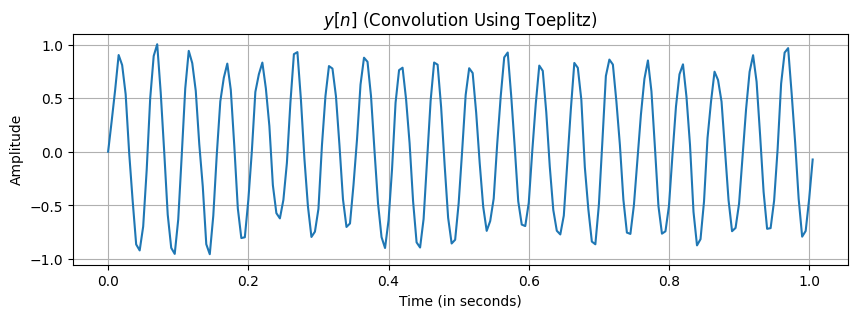

In [29]:
plt.figure(figsize = (10,3))

plt.plot(t_y,convolve_linear_toeplitz(x,h))
plt.title('$y[n]$ (Convolution Using Toeplitz)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

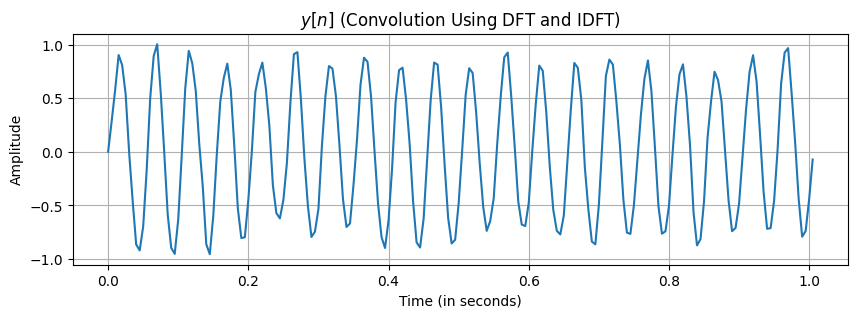

In [30]:
plt.figure(figsize = (10,3))

plt.plot(t_y,convolve_linear_using_dft(x,h))
plt.title('$y[n]$ (Convolution Using DFT and IDFT)')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amplitude')
plt.grid()

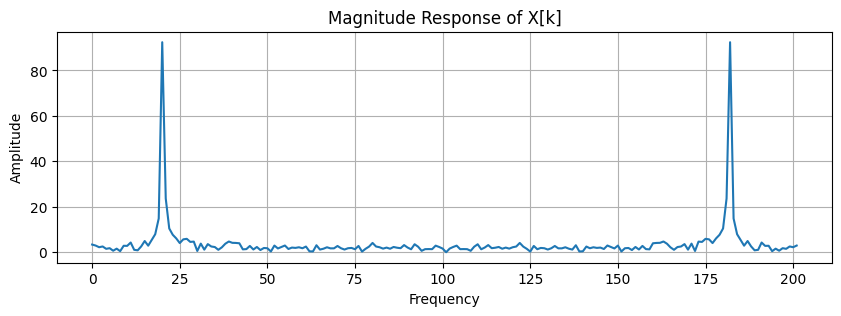

In [23]:
plt.figure(figsize = (10,3))

plt.plot(np.abs(np.fft.fft(x,N)))
plt.title('Magnitude Response of X[k]')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

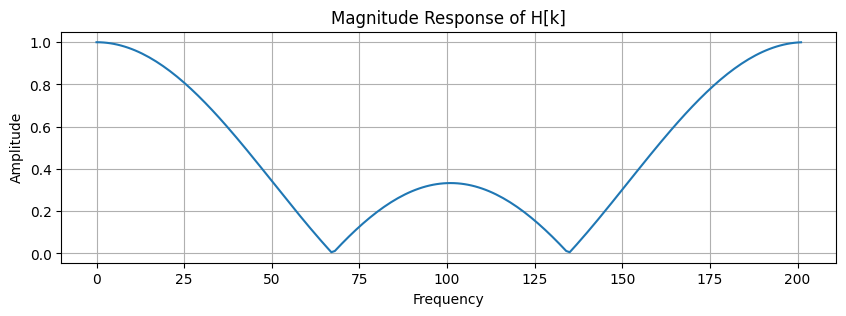

In [24]:
plt.figure(figsize = (10,3))

plt.plot(np.abs(np.fft.fft(h,N)))
plt.title('Magnitude Response of H[k]')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()

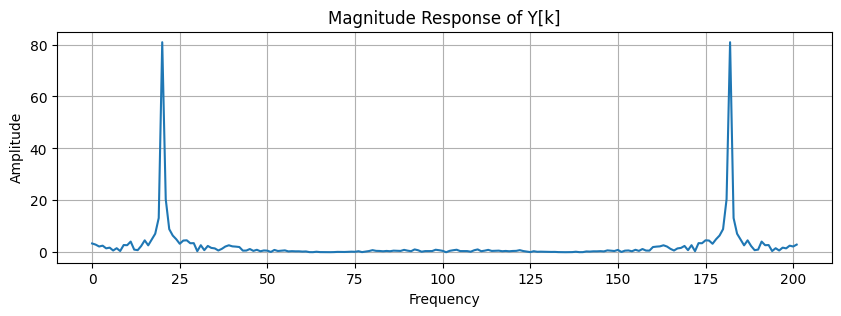

In [25]:
plt.figure(figsize = (10,3))

plt.plot(np.abs(np.fft.fft(convolve_linear_using_dft(x,h),N)))
plt.title('Magnitude Response of Y[k]')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()